In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from pathlib import Path

In [14]:
# Use seaborn theme
sns.set_theme(style="white", context="paper")

# Set your mpl settings
mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 40
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial"]
mpl.rcParams["axes.titlesize"] = "xx-large"
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["axes.labelsize"] = 30
mpl.rcParams["xtick.labelsize"] = 30
mpl.rcParams["ytick.labelsize"] = 30
mpl.rcParams["text.color"] = 'black'

In [15]:
csv_path = "plantwise_testsets_metrics.csv"
# Read csv with metrics for all models when using plantwise test-sets
df = pd.read_csv(csv_path)

In [16]:
root_lengths_path = "average_root_lengths.csv"
# Read csv with average root lengths for all user-labeled data per model
df_root_lengths = pd.read_csv(root_lengths_path)

**Median Localization Error**

In [17]:
# Print average median localization error for all models
df[["Root-label", "Error distance (50%) mm"]].groupby("Root-label").apply(np.nanmean).sort_values()

Root-label
Soybean lateral (5-8 DAG)      0.327268
Canola lateral (5-13 DAG)      0.365802
Rice primary (3 DAG)           0.539643
Rice seminal (3 DAG)           0.661921
Arabidopsis lateral (7 DAG)    0.842702
Canola primary (5-13 DAG)      1.282756
Arabidopsis primary (7 DAG)    1.537197
Soybean primary (5-8 DAG)      1.668541
Rice seminal (10 DAG)          2.280872
dtype: float64

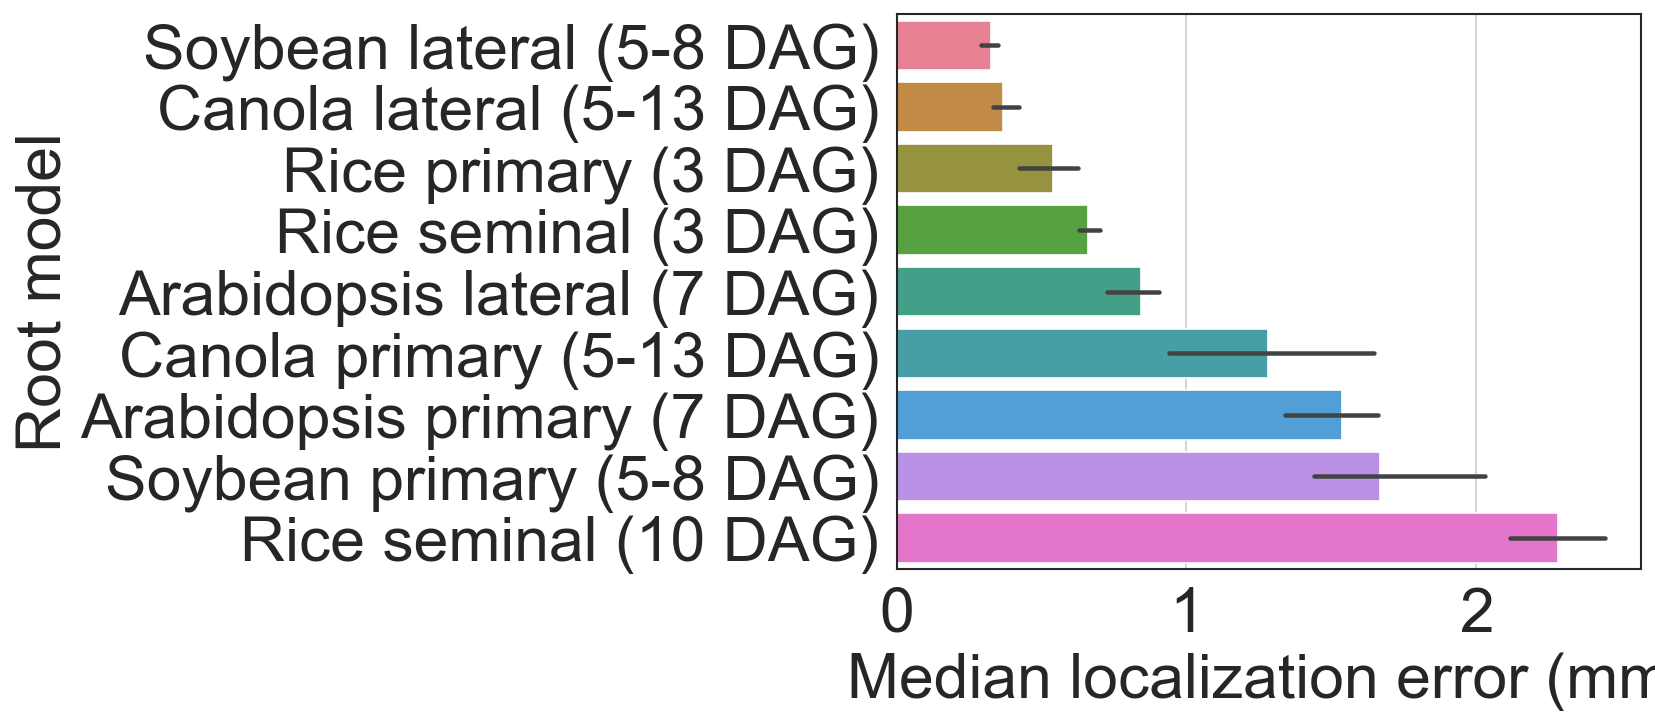

In [18]:
# Plot average median localization error for all models
order = df[["Root-label", "Error distance (50%) mm"]].groupby("Root-label").apply(np.nanmean).sort_values().index
ax = sns.barplot(data=df, y="Root-label", x="Error distance (50%) mm", order=order, palette="husl")
ax.set(xlabel='Median localization error (mm)', ylabel='Root model')
ax.grid(axis='x')

plt.show()

In [19]:
# Get the color codes from the "husl" palette
husl_colors = sns.color_palette("husl", 9)

# Convert the color codes to a list of tuples
custom_colors = [tuple(color) for color in husl_colors]

# Print the color codes
for color in custom_colors:
    print(color)

(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
(0.8369430560927636, 0.5495828952802333, 0.1952683223448124)
(0.6430915736746491, 0.6271955086583126, 0.19381135329796756)
(0.3126890019504329, 0.6928754610296064, 0.1923704830330379)
(0.20582072623426667, 0.6842209016721068, 0.5675558225732941)
(0.2151139535594307, 0.6700707833028816, 0.7112365203426209)
(0.23299120924703914, 0.639586552066035, 0.9260706093977744)
(0.731751635642941, 0.5128186367840487, 0.9581005178234921)
(0.9614880299080136, 0.3909885385134758, 0.8298287106954371)


c:\ProgramData\mambaforge\envs\berrigan_et_al\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\mambaforge\envs\berrigan_et_al\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


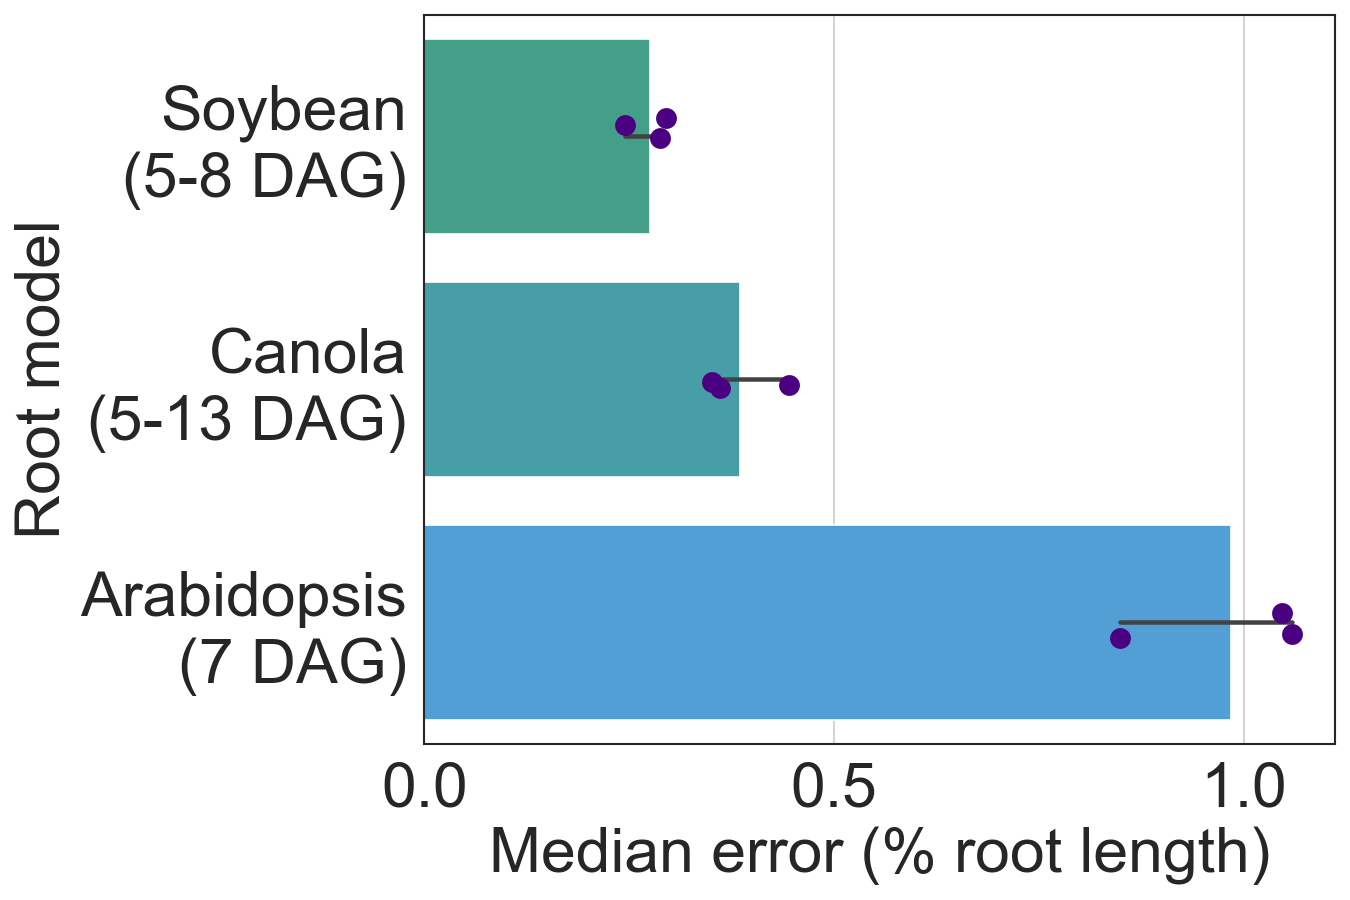

In [20]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Define the list of target labels
lateral_labels = ["Soybean lateral (5-8 DAG)", "Canola lateral (5-13 DAG)", "Arabidopsis lateral (7 DAG)"]

# Filter the dataframe based on the target labels
lateral_df = df.copy()
lateral_df = lateral_df[lateral_df["Root-label"].isin(lateral_labels)]

# Create a dataframe with the average root lengths for the target labels
avg_df = df_root_lengths.copy()
avg_df = avg_df[avg_df["Root-label"].isin(lateral_labels)].groupby("Root-label")["Average Root Length"].mean()
# Add the average root length as a new column
lateral_df['Average Root Length'] = lateral_df['Root-label'].map(avg_df)

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
lateral_df[normalized_trait] = lateral_df.apply(lambda row: (row[trait] / avg_df[row["Root-label"]]) * 100, axis=1)

# Order by mean error 
order_lat = lateral_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "lateral" and put parentheses part on a new line
y_labels_lr = [label.replace(" lateral", "").replace(" (", "\n(") for label in order_lat]

fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot
sns.barplot(data=lateral_df, y="Root-label", x=normalized_trait, order=order_lat, palette=custom_colors[4:7], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=lateral_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_lat, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_lr)

plt.tight_layout()

# Save the plot
png_path = r"median_loc_percent_root_length_error_laterals.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
lateral_df.to_csv(csv_path, index=False)

In [21]:
# Define the list of target labels
primary_labels = ["Rice primary (3 DAG)", "Canola primary (5-13 DAG)", "Arabidopsis primary (7 DAG)", "Soybean primary (5-8 DAG)"]

# Filter the dataframe based on the target labels
primary_df = df[df["Root-label"].isin(primary_labels)]
primary_df.shape

(12, 13)

C:\Users\eb\AppData\Local\Temp\ipykernel_24516\2320655689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_df[normalized_trait] = primary_df.apply(lambda row: (row[trait] / avg_df_primary[row["Root-label"]]) * 100, axis=1)
C:\Users\eb\AppData\Local\Temp\ipykernel_24516\2320655689.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_df['Average Root Length'] = primary_df['Root-label'].map(avg_df_primary)
c:\ProgramData\mambaforge\envs\berrigan_et_al\Lib\site-packages\seaborn\_oldcore.py:11

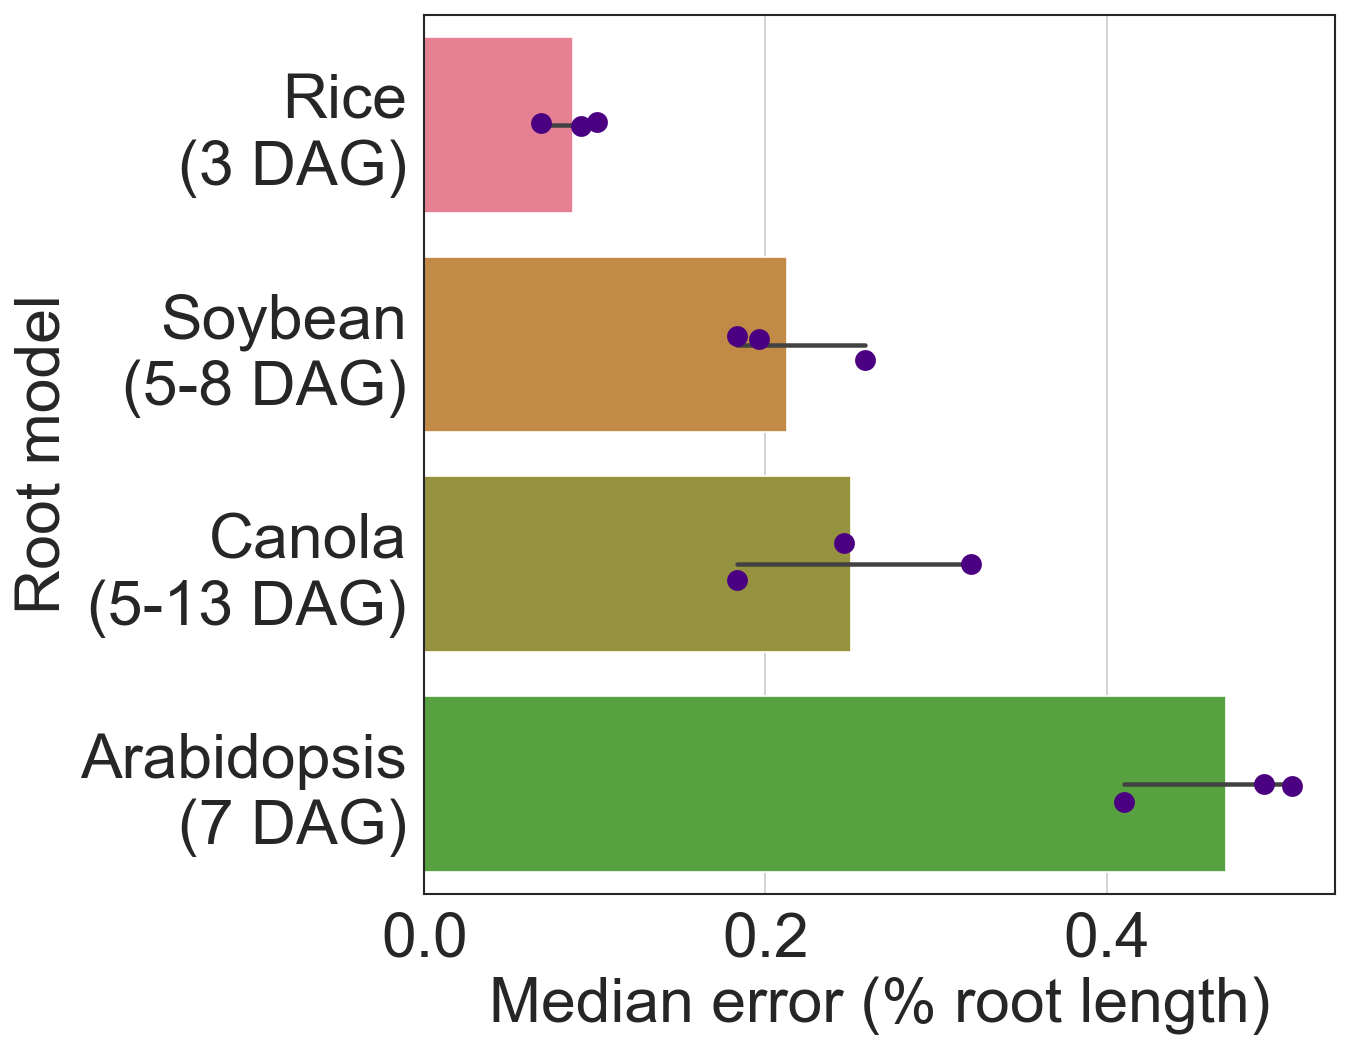

In [22]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Create a dataframe with the average root lengths for the target labels
avg_df_primary = df_root_lengths.copy()
avg_df_primary = avg_df_primary[avg_df_primary["Root-label"].isin(primary_labels)].groupby("Root-label")["Average Root Length"].mean()

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
primary_df[normalized_trait] = primary_df.apply(lambda row: (row[trait] / avg_df_primary[row["Root-label"]]) * 100, axis=1)
# Add the average root length as a new column in primary_df
primary_df['Average Root Length'] = primary_df['Root-label'].map(avg_df_primary)

order_primary = primary_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "primary"
y_labels_pr = [label.replace(" primary", "").replace(" (", "\n(") for label in order_primary]

fig, ax = plt.subplots(figsize=(10, 8))

# Bar plot
sns.barplot(data=primary_df, y="Root-label", x=normalized_trait, order=order_primary, palette=custom_colors[0:4], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=primary_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_primary, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_pr)

plt.tight_layout()

# Save the plot
png_path = r"median_loc_percent_root_length_error_primary.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
primary_df.to_csv(csv_path, index=False)

In [23]:
# Define the list of target labels
seminal_labels = ["Rice seminal (3 DAG)", "Rice seminal (10 DAG)"]

# Filter the dataframe based on the target labels
seminal_df = df[df["Root-label"].isin(seminal_labels)]
seminal_df.shape

(6, 13)

C:\Users\eb\AppData\Local\Temp\ipykernel_24516\1678452792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seminal_df[normalized_trait] = seminal_df.apply(lambda row: (row[trait] / avg_df_seminal[row["Root-label"]]) * 100, axis=1)
C:\Users\eb\AppData\Local\Temp\ipykernel_24516\1678452792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seminal_df['Average Root Length'] = seminal_df['Root-label'].map(avg_df_seminal)
c:\ProgramData\mambaforge\envs\berrigan_et_al\Lib\site-packages\seaborn\_oldcore.py:11

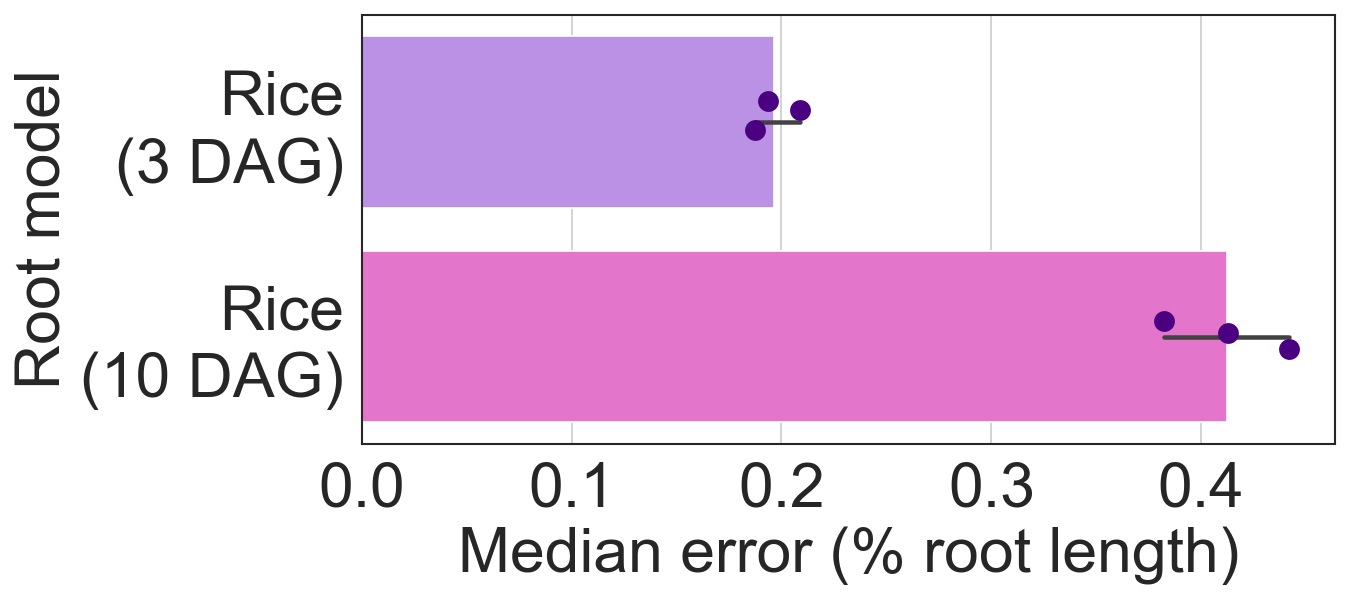

In [24]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Create a dataframe with the average root lengths for the target labels
avg_df_seminal = df_root_lengths.copy()
avg_df_seminal = avg_df_seminal[avg_df_seminal["Root-label"].isin(seminal_labels)].groupby("Root-label")["Average Root Length"].mean()

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
seminal_df[normalized_trait] = seminal_df.apply(lambda row: (row[trait] / avg_df_seminal[row["Root-label"]]) * 100, axis=1)
# Add the average root length as a new column in seminal_df
seminal_df['Average Root Length'] = seminal_df['Root-label'].map(avg_df_seminal)

order_sem = seminal_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "seminal" based on order_sem for consistency
y_labels_sem = [label.replace(" seminal", "").replace(" (", "\n(") for label in order_sem]

fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot
sns.barplot(data=seminal_df, y="Root-label", x=normalized_trait, order=order_sem, palette=custom_colors[7:9], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=seminal_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_sem, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_sem)

plt.tight_layout()

# Save the plot
png_path = r"median_loc_percent_root_length_error_seminal.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
seminal_df.to_csv(csv_path, index=False)